In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Link do folderu:
https://aghedupl-my.sharepoint.com/:f:/r/personal/dracz_student_agh_edu_pl/Documents/Uczenie%20Maszynowe/Ucznie%20nadzorowane%20-%20klasyfikacja?csf=1&web=1&e=MndCkA

## Wczytanie zbioru danych

In [2]:
names = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcanity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    	'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

data = pd.read_csv("wine.data", names = names, header = None)
data

,Type,Alcohol,Malic acid,Ash,Alcanity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcanity of ash       178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# dostosowanie typów
data['Magnesium'] = data['Magnesium'].astype(float)
data['Proline'] = data['Proline'].astype(float)

## Normalizacja

Normalizacja została dokonana za pomocą metody min - max:
\begin{equation}
X_{i}^{norm} = \frac{X_{i} - min(X)}{max(X) - min(X)}
\end{equation}

In [5]:
norm_data = data.copy()

min_vals = data.iloc[:, 1:].min().values
max_vals = data.iloc[:, 1:].max().values


norm_data.iloc[:, 1:] = (data.iloc[:, 1:] - min_vals) / (max_vals - min_vals)
norm_data

,Type,Alcohol,Malic acid,Ash,Alcanity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,3,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,3,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,3,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


Normalizacja polega na sprowadzeniu wartości danych zmiennych do przedziału [0;1].
Krok ten jest wykonywany, ponieważ różne zmienne mogą cechować się różnymi zakresami zmienności wartości, co jest problematyczne dla niektórych algorytmów, które wykorzystują w działaniu metryki mierzące dystans.

Algorytm klasyfikacji <b>K najbliższych sąsiadów</b> wymaga normalizacji. Nie jest ona za to teoretycznie wymagana dla <b>Random Forest</b>

## Podział na zbiór treningowy i testowy

In [6]:
X = norm_data.iloc[:,1:]
y = norm_data[['Type']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 332)

X_train.shape, X_test.shape

((124, 13), (54, 13))

## Klasyfikacja K najbliższych sąsiadów

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)

In [11]:
knn_clf.fit(X_train, y_train.values.flatten())

KNeighborsClassifier()

In [12]:
yy_knn = knn_clf.predict(X_test)

In [13]:
yy_knn

array([3, 1, 3, 3, 2, 1, 2, 2, 3, 3, 3, 1, 2, 2, 1, 3, 1, 2, 1, 3, 3, 1,
       3, 1, 3, 2, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 3, 3, 3, 1,
       2, 3, 3, 2, 3, 1, 2, 1, 1, 2])

## Klasyfikacja Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_clf = RandomForestClassifier(random_state = 32)

In [16]:
rf_clf.fit(X_train, y_train.values.flatten())

RandomForestClassifier(random_state=32)

In [17]:
yy_rf = rf_clf.predict(X_test)
yy_rf

array([3, 1, 3, 3, 2, 1, 2, 2, 3, 3, 3, 1, 2, 2, 1, 3, 1, 2, 1, 3, 3, 2,
       3, 1, 3, 2, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 2, 3, 3, 1,
       2, 3, 3, 2, 3, 1, 2, 2, 1, 2])

## Ocena jakości modelu

### Miary służące do oceny klasyfikacji
- <b>accuracy</b> - odsetek poprawnie zaklasyfikowanych przykładów względem całego zbioru
- <b>Miary dla klasyfikacji binarnej (dla każdej klasy, nawet, gdy jest ich więcej niż 2, można obliczyć te wartości korzystając z klasyfikatora binarnego)</b>:
    - <b>precision</b> - odsetek poprawnie zaklasyfikowanych przykładów względem wszystkich zaklasyfikowanych jako pozytywne (jaki odsetek obiektów zaklasyfikowanych do danej klasy został poprawnie zaklasyfikowany)
    - <b>recall</b> - odsetek poprawnie zaklasyfikowanych przykładów względem faktycznej ilości obiektów należących do danej klasy (mówi jaki procent obiektów danej klasy został do niej zaklasyfikowany)
    - <b>F_measures</b> - średnia harmoniczna precision i recall (wskaźnik łączący oba parametry w jeden; średnia harmoniczna nadaje większą wagę mniejszej wartości)
- <b>confusion matrix</b> - macierz pomyłek, opisuje ilość przykładów poprawnie i niepoprawnie zaklasyfikowanych lub niezaklasyfikowanych do danej klasy - wiersze opisują rzeczywistą klasę, do której należy dany obiekt, a kolumny - wyniki predykcji klasyfikatora

<b>classification report</b> pokazuje tekstową wersję z zapisanymi główymi metrykami dla klasyfikacji (precision, recall, f1-score). Do tego dodaje paremtr support - ilość obiektów należących do danej klasy w zbiorze danych.
Dla klasyfikacji wieloklasowej wylicza dodatkowo średnie dla danych parametrów:
- weighted - średnia ważona wartości metryk dla danych klas (wagą jest ilość obiektów danej klasy - support),
- micro - wartość obliczana z uwzglęgnieniem odpowiednich wartości dla poszczególnych klas (True Positive, True Negative, False Positive, False Negative)
- macro - obliczane są osobno wartości metryk dla danych klas, po czym jest liczona ich średnia arytmetyczna.

In [18]:
from sklearn.metrics import classification_report

print("Dla klasyfikatora K-nn:\n")
print(classification_report(y_test, yy_knn))
print("\n==================\n")
print("Dla klasyfikatora Random Forest:\n")
print(classification_report(y_test, yy_rf))

Dla klasyfikatora K-nn:

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.86      0.92        21
           3       0.95      1.00      0.97        19

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



Dla klasyfikatora Random Forest:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        19

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Z raportu można wyczytać, że oba klasyfikatory miały wysoką dokładność.
Klasyfikator K najbliższych sąsiadów jednak pomylił się w kilku przypadkach, a Random Forest miał na zbiorze testowym skuteczność 100%.

Klasyfikator K-nn:
- dla typu 1: precision = 0.88, a więc oznacza to, że 88% spośród przykładów zaklasyfikowanych do tego typu zostało zaklasyfikowanych poprawnie; recall = 1 oznacza, że wszystkie obiekty z tej klasy zostały zaklasyfikowane poprawnie,
- dla typu 2: precision = 1; recall = 0.86, a więc nie wszystkie obiekty typu 2 zostały zaklasyfikowane do tego typu, ale, wszystkie zaklasyfikowane jako typ 2 zostały zaklasyfikowane poprawnie,
- dla typu 3: precision = 0.95; recall = 1, a więc obiekty zaklasyfikowane do typu 3 zostały zaklasyfikowane w 95% poprawnie i wszystkie obiekty typu 3 w zbiorze testowym zostały przydzielone do właściwej klasy.

Można tu również zauważyć zależność - kiedy rośnie precision, to spada recall i odwrotnie. Wybór odpowiedniego klasyfikatora i jego hiperparametrów jest zatem zazwyczaj pewnym kompromisem między jednym z tych dwóch parametrów.

Wyniki działania algorytmu są też zależne od wielkości zbiorów testowego i treningowego, a także od czynników losowych (które występują przy podziale na zbiór testowy i treningowy, a także dla klasyfikacji Random Forest - w celu wymuszenia działania deterministycznego został ustawiony dla nich parametr random_state).

Inne metryki, które można użyć do badania zbioru to:
- <b>specificity</b> - odsetek wartości prawdziwych negatywnych względem wszystkich wartości faktycznie negatywnych w zbiorze,
- <b>negative precision</b> - odsetek przykładów zaklasyfikowanych poprawnie jako negatywne względem wszystkich przykładów zaklasyfikowanych jako negatywne

In [25]:
from sklearn.metrics import confusion_matrix

In [20]:
conf_mtx_knn = confusion_matrix(y_test, yy_knn)
conf_mtx_rf = confusion_matrix(y_test, yy_rf)

In [21]:
spec_knn = []
neg_prec_knn = []

spec_rf = []
neg_prec_rf = []

for i in range(3):
    tp = conf_mtx_knn[i,i]
    fp = conf_mtx_knn[:,i].sum() - tp
    fn = conf_mtx_knn[i,:].sum() - tp
    tn = conf_mtx_knn.ravel().sum() - tp - fp - fn

    if tn + fp != 0:
        spec = tn / (tn + fp)
        spec_knn.append(spec)
    else:
        spec_knn.append(0)

    if tn + fn != 0:
        neg_prec = tn / (tn + fn)
        neg_prec_knn.append(neg_prec)
    else:
        neg_prec_knn.append(0)
  

In [22]:
for i in range(3):
    tp = conf_mtx_rf[i,i]
    fp = conf_mtx_rf[:,i].sum() - tp
    fn = conf_mtx_rf[i,:].sum() - tp
    tn = conf_mtx_rf.ravel().sum() - tp - fp - fn

    if tn + fp != 0:
        spec = tn / (tn + fp)
        spec_rf.append(spec)
    else:
        spec_rf.append(0)

    if tn + fn != 0:
        neg_prec = tn / (tn + fn)
        neg_prec_rf.append(neg_prec)
    else:
        neg_prec_rf.append(0)

In [23]:
print("K-nn")
for i in range(3):
    print(f"Type {i+1}    specificity = {spec_knn[i]:.2f}      negative_precision = {neg_prec_knn[i]:.2f}")

print("\n=====================\n")
print("Random Forest")
for i in range(3):
    print(f"Type {i+1}    specificity = {spec_rf[i]:.2f}      negative_precision = {neg_prec_rf[i]:.2f}")

K-nn
Type 1    specificity = 0.95      negative_precision = 1.00
Type 2    specificity = 1.00      negative_precision = 0.92
Type 3    specificity = 0.97      negative_precision = 1.00


Random Forest
Type 1    specificity = 1.00      negative_precision = 1.00
Type 2    specificity = 1.00      negative_precision = 1.00
Type 3    specificity = 1.00      negative_precision = 1.00


Możemy wyczytać, że ponownie oba klasyfikatory z dużą skutecznością wyznaczają wartości nienależące do danej klasy. Podobnie jak z precision i recall, zauważyć można, że wzrost specificity jest powiązany ze spadkiem negative precision.

Specificity na poziome 0.95 dla typu 1 oznacza, że 95% ze wszystkich obiektów nienależących do typu 1 zostało poprawnie zaklasyfikowanych jako nienależące do tego typu. Z kolei negative_precision = 1 znaczy, że wszystkie obiekty zaklasyfikowane jako nienależące do tego typu faktycznie do niego nie należą.

Z kolei np. dla typu 2 specificity = 1 oznacza, że wszystkie przykłady nienależące do tej klasy zostały zaklasyfikowane poprawnie. Jednak negative precision = 0.92 znaczy, że były też przykłady należące do tego typu zaklasyfikowane jako nienależące.

Z kolei dla Random Forest wszystkie wartości wyznaczone zostały poprawnie.

Można zauważyć, że specificity jest wartością analogiczną dla recall, a negative precision dla precision. Obie metryki obliczane są jednak dla wartości negatywnych (a więc nienależących do danej klasy).

Macierz pomyłek można zwizualizować:

Text(0.5, 1.0, 'Macierz pomyłek dla klasyfikatora Knn')

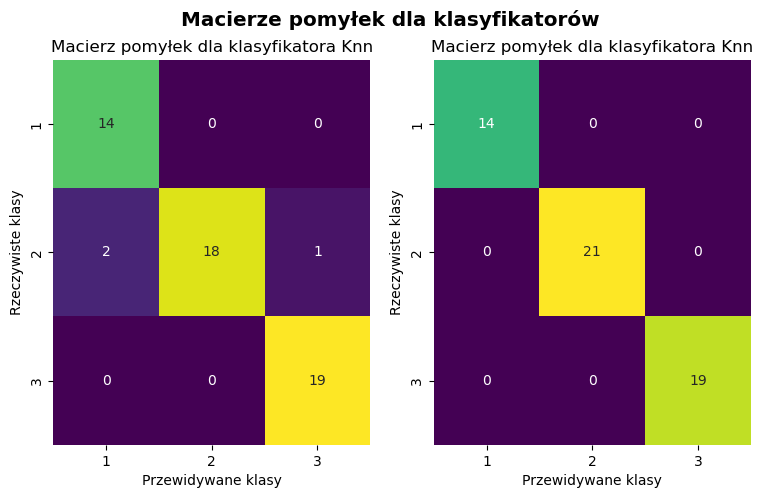

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (9,5), facecolor = 'white')

fig.suptitle("Macierze pomyłek dla klasyfikatorów", fontsize = "x-large", fontweight = "bold")

sns.heatmap(confusion_matrix(y_test, yy_knn), annot = True, cmap = "viridis", ax = ax[0], cbar = False)
ax[0].set_xlabel("Przewidywane klasy")
ax[0].set_ylabel("Rzeczywiste klasy")
ax[0].set_xticklabels([1, 2, 3])
ax[0].set_yticklabels([1, 2, 3])
ax[0].set_title("Macierz pomyłek dla klasyfikatora Knn")

sns.heatmap(confusion_matrix(y_test, yy_rf), annot = True, cmap = "viridis", ax = ax[1], cbar = False)
ax[1].set_xlabel("Przewidywane klasy")
ax[1].set_ylabel("Rzeczywiste klasy")
ax[1].set_xticklabels([1, 2, 3])
ax[1].set_yticklabels([1, 2, 3])
ax[1].set_title("Macierz pomyłek dla klasyfikatora Knn")

### Bez normalizacji
W celach poglądowych można przeprowadzić klasyfikację dla zbioru przed normalizacją w celu porównania jak ten zabieg wpływa na wynik predykcji.

In [26]:
X2 = data.iloc[:,1:]
y2 = data[['Type']]

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 332)

In [28]:
knn2_clf = KNeighborsClassifier()

In [29]:
knn2_clf.fit(X_train2, y_train2.values.flatten())

KNeighborsClassifier()

In [30]:
rf2_clf = RandomForestClassifier(random_state = 32)

In [31]:
rf2_clf.fit(X_train2, y_train2.values.flatten())

RandomForestClassifier(random_state=32)

In [32]:
yy2_knn = knn2_clf.predict(X_test)
yy2_rf = rf2_clf.predict(X_test)

In [33]:
print("Dla klasyfikatora K-nn:\n")
print(classification_report(y_test, yy2_knn, zero_division = 0))
print("\n==================\n")
print("Dla klasyfikatora Random Forest:\n")
print(classification_report(y_test, yy2_rf, zero_division = 0))

Dla klasyfikatora K-nn:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.39      1.00      0.56        21
           3       0.00      0.00      0.00        19

    accuracy                           0.39        54
   macro avg       0.13      0.33      0.19        54
weighted avg       0.15      0.39      0.22        54



Dla klasyfikatora Random Forest:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.39      1.00      0.56        21
           3       0.00      0.00      0.00        19

    accuracy                           0.39        54
   macro avg       0.13      0.33      0.19        54
weighted avg       0.15      0.39      0.22        54



Wyniki są znacznie gorsze niż przy normalizacji.
Wartość accuracy dla obu metod jest równa zaledwie 0.39.
Wszystkie przykłady (w oby przypadkach) zostały zaklasyfikowane do typu 2.
Wynik ten pokazuje, że normalizacja w tym wypadku, dla tych metod i zbioru danych, jest wymagana, aby uzyskać rzetelne wyniki.

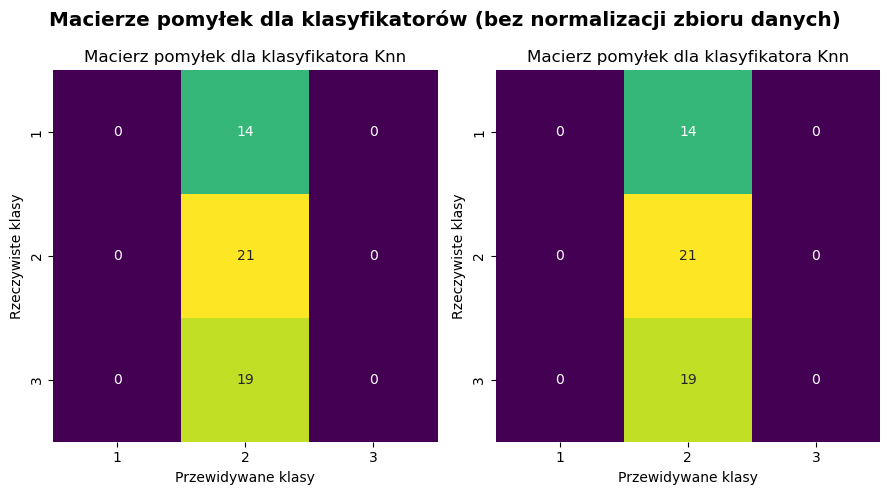

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (9,5), facecolor = 'white')

fig.suptitle("Macierze pomyłek dla klasyfikatorów (bez normalizacji zbioru danych)", fontsize = "x-large", fontweight = "bold")

sns.heatmap(confusion_matrix(y_test2, yy2_knn), annot = True, cmap = "viridis", ax = ax[0], cbar = False)
ax[0].set_xlabel("Przewidywane klasy")
ax[0].set_ylabel("Rzeczywiste klasy")
ax[0].set_xticklabels([1, 2, 3])
ax[0].set_yticklabels([1, 2, 3])
ax[0].set_title("Macierz pomyłek dla klasyfikatora Knn")

sns.heatmap(confusion_matrix(y_test2, yy2_rf), annot = True, cmap = "viridis", ax = ax[1], cbar = False)
ax[1].set_xlabel("Przewidywane klasy")
ax[1].set_ylabel("Rzeczywiste klasy")
ax[1].set_xticklabels([1, 2, 3])
ax[1].set_yticklabels([1, 2, 3])
ax[1].set_title("Macierz pomyłek dla klasyfikatora Knn")

plt.tight_layout()

## Wnioski
W przypadku analizowanego zbioru danych klasyfikator Random Forest dał znacznie lepsze wyniki niż klasyfikator K-najbliższych sąsiadów.

Może to wynikać z tego, że algorytm Random Forest opiera się na uczeniu zespołowym, a więc jest trenowana grupa klasyfikatorów i wybierany jest najlepszy (w domyślnym ustawieniu trenowanych jest 100 klasyfikatorów). Dodatkowo las losowy dodaje element losowy w działaniu algorytmu, więc pozwala to na większą różnorodność wyników.

Klasyfikator K-nn przyporządkowuje obiekt w zależności od tego do jakiej klasy należą obiekty leżące najbliżej niego. W związku z tym jest on dość dobrym i w miarę dokładnym wyborem, ale nie tak elastycznym jak Random Forest.

Analiza i badanie metod wykazały również konieczność normalizacji zbioru danych przed zastosowaniem danych metod.